# MSDS 422-DL Project

Anthony Gallante<br>
Feb 9, 2025

## Final Project - Midpoint

In [1]:
import os

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Removing the Maximum Columns option to create a
# side-scrollable dataframe in the notebook output.
pd.options.display.max_columns = None

# Setting the ggplot style for matplotlib plots.
plt.style.use('ggplot')

Reading in data files

In [2]:
def strColToDatetime(df):
    return [datetime.strptime(dt, '%Y-%m-%d %H:%M:%S') for dt in df['datetime']]

summer_df = pd.read_csv('muskox_summer_data.csv').dropna()
winter_df = pd.read_csv('muskox_winter_data.csv').dropna()

summer_df['datetime'] = strColToDatetime(summer_df)
winter_df['datetime'] = strColToDatetime(winter_df)

In [3]:
display(summer_df.head(2))
display(winter_df.head(2))

,burst_id,step,angle,x,y,datetime,tday,month,julian,light,year_2014,year_2015,year_2016,year_2017,elevation_scaled,dist_sea_scaled,hillshade_scaled,ruggedness_scaled,ocean,water,glacier,bareground,sparseveg,denseveg,snowdepth_scaled,airtemp_scaled,windspeed_scaled,winddir_interpol,total_precip_scaled,ndvi_scaled,viterbi
1,4022_31_1_3_snowfree_2016,83.108942,2.662288,479810.695025,8.265607e+06,2016-06-19 01:00:00,1,6,171,1,0,0,1,0,0.358883,-0.168525,-1.640944,0.859694,0,0,0,1,0,0,-1.367948,1.324766,-0.626076,291.5,-0.241742,-0.60376,2
2,4022_31_1_3_snowfree_2016,27.117565,-2.172764,479825.208600,8.265689e+06,2016-06-19 02:00:00,2,6,171,1,0,0,1,0,0.437094,-0.141171,-1.984517,1.268340,0,0,0,1,0,0,-1.367948,1.333743,-0.807630,293.6,-0.241742,-0.60376,2


,burst_id,step,angle,x,y,datetime,tday,month,julian,light,year_201314,year_201415,year_201516,year_201617,elevation_scaled,dist_sea_scaled,hillshade_scaled,ruggedness_scaled,ocean,water,glacier,bareground,sparseveg,denseveg,snowdepth_scaled,airtemp_scaled,windspeed_scaled,winddir_interpol,total_precip_scaled,viterbi
1,4022_03_1_1_snow_201314,131.096201,-2.946798,513103.695025,8.266415e+06,2013-10-08 14:00:00,14,10,281,1,1,0,0,0,-0.949146,-0.168957,0.020371,-0.825011,0,0,0,0,0,1,-0.138155,0.61556,-0.202452,14.6,-0.241742,2
2,4022_03_1_1_snow_201314,1.707630,0.985363,513054.208600,8.266537e+06,2013-10-08 15:00:00,15,10,281,1,1,0,0,0,-0.932100,-0.140752,0.411838,-1.017769,0,0,0,0,0,1,-0.138155,0.61556,-0.202452,14.6,-0.241742,1


In [4]:
n_states = 3

state_decoder = {1: 'Resting', 2: 'Foraging', 3: 'Relocating'}

# Trying to find similar state colors to the Muskox paper
state_colors = {'Resting': mcolors.XKCD_COLORS['xkcd:squash'],
                'Foraging': mcolors.XKCD_COLORS['xkcd:dark sage'],
                'Relocating': mcolors.XKCD_COLORS['xkcd:light blue grey']
                }

for df in [summer_df, winter_df]:
    df['state'] = [state_decoder[v] for v in df['viterbi']]
    df['colors'] = [state_colors[c] for c in df['state']]

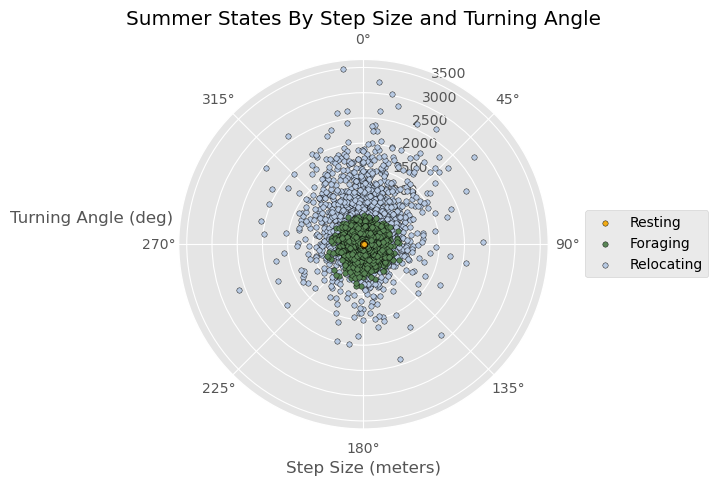

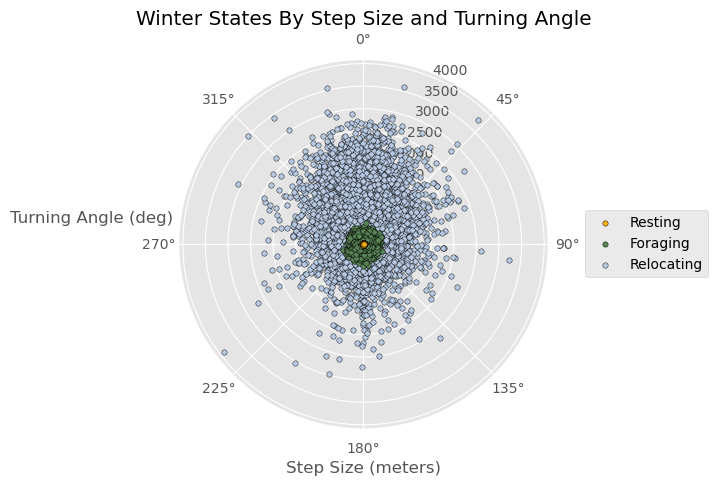

In [5]:
for season, season_df in zip(['Summer', 'Winter'], [summer_df, winter_df]):

    plt.figure()
    for i, state in enumerate(range(1, n_states+1)):
        is_in_state = season_df['viterbi'] == state
        state_df = season_df[is_in_state]

        ax = plt.subplot(polar=True)
        ax.set_theta_zero_location('N')
        ax.set_theta_direction(-1)

        ax.scatter(x=state_df['angle'], y=state_df['step'], color=state_colors[state_decoder[state]], zorder=10-i, edgecolor='k', label=state_decoder[state], s=15, lw=0.3)
        
        plt.title(f'{season} States By Step Size and Turning Angle')
        plt.xlabel('Step Size (meters)')
        plt.ylabel('Turning Angle (deg)', rotation=0, ha='right', y=0.55)
        plt.legend(loc=[1.1, 0.41])

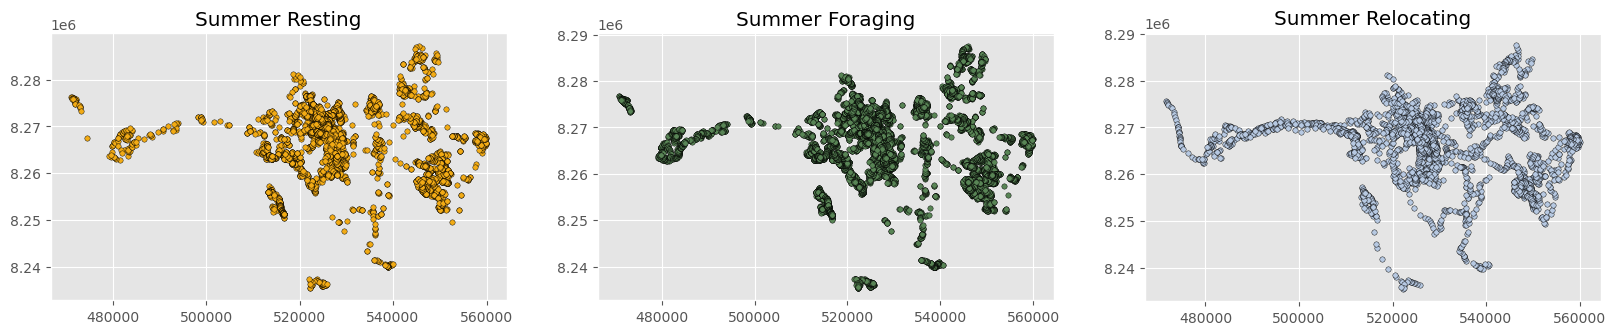

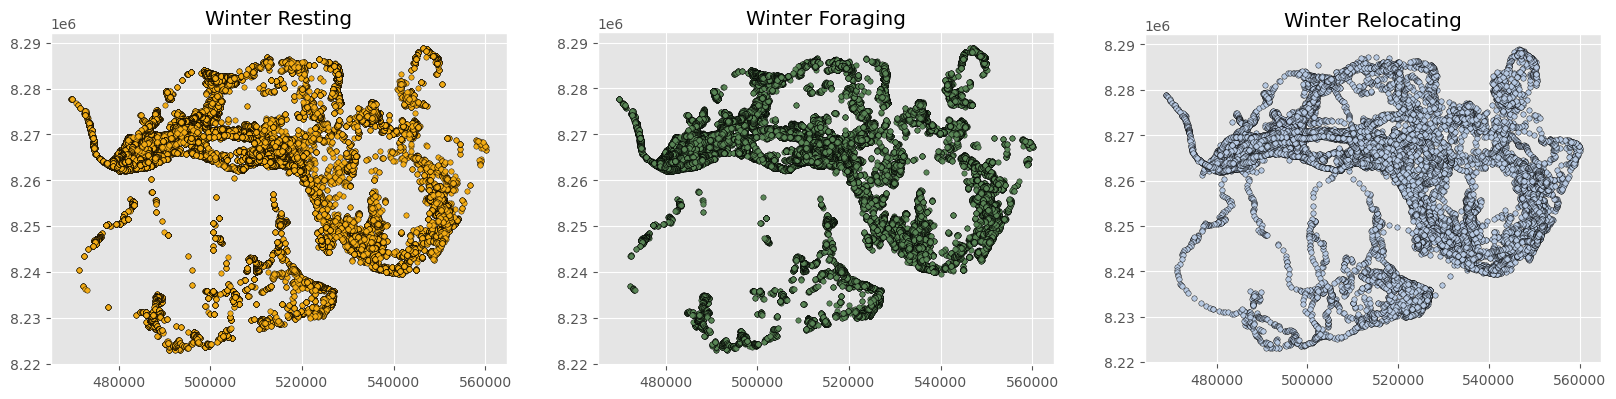

In [6]:
for season, season_df in zip(['Summer', 'Winter'], [summer_df, winter_df]):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

    for i, state in enumerate(range(1, n_states+1)):
        is_in_state = season_df['viterbi'] == state
        state_df = season_df[is_in_state]
    
        axes[i].scatter(state_df['x'], state_df['y'], color=state_colors[state_decoder[state]], edgecolor='k', lw=0.3, s=15)
        axes[i].set_ylim([4.7e5, 5.61e5])
        axes[i].set_ylim([8.2e6, 8.3e6])
        axes[i].axis('scaled')
        axes[i].set_title(f'{season} {state_decoder[i+1]}')

plt.show()

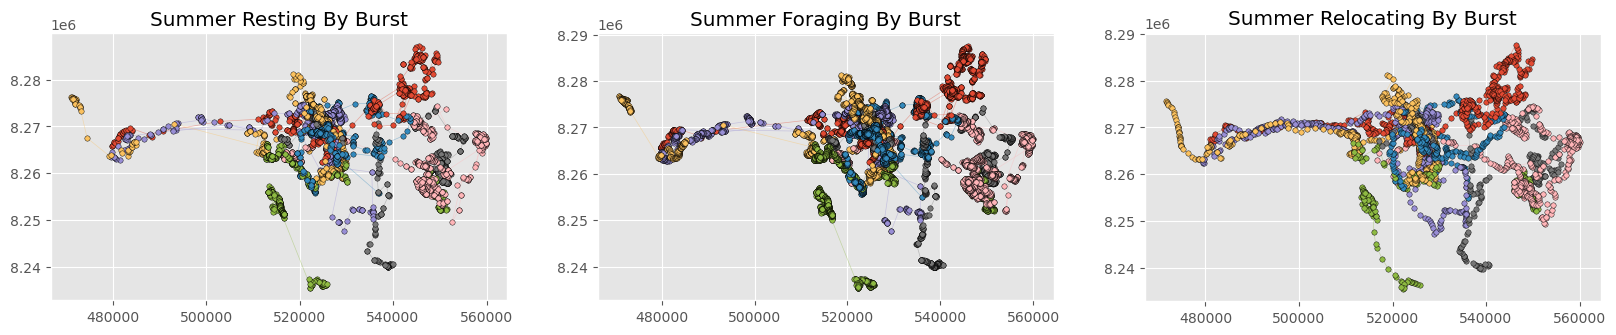

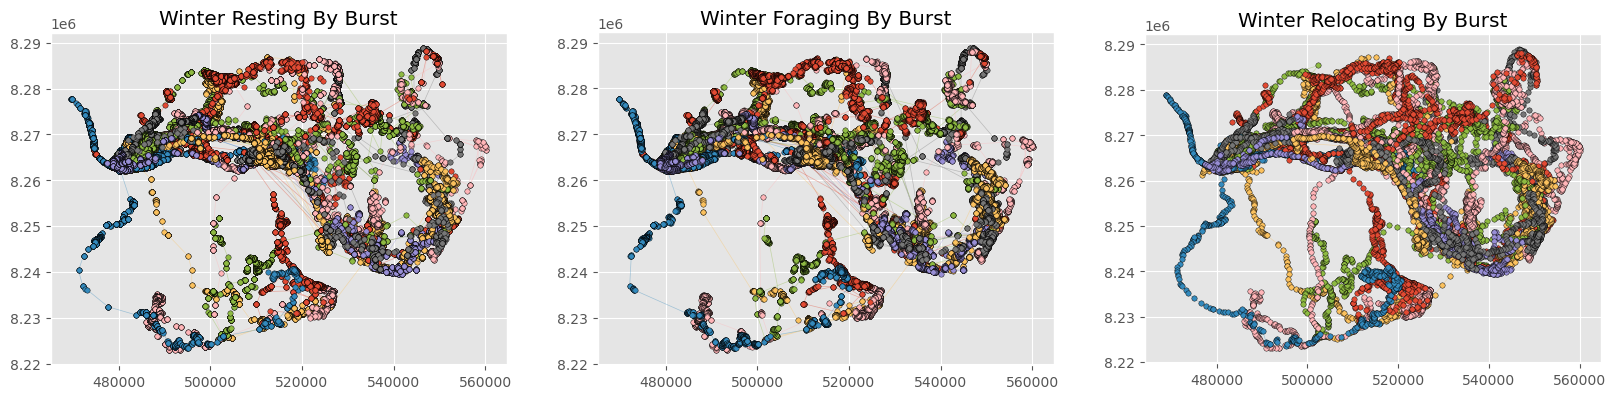

In [7]:
for season, season_df in zip(['Summer', 'Winter'], [summer_df, winter_df]):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

    for i, state in enumerate(range(1, n_states+1)):
        is_in_state = season_df['viterbi'] == state
        state_df = season_df[is_in_state]

        for burst_id in season_df['burst_id'].unique():
            is_burst_id = state_df['burst_id'] == burst_id
            state_burst_df = state_df[is_burst_id]

            axes[i].scatter(state_burst_df['x'], state_burst_df['y'], s=15, edgecolor='k', zorder=10, lw=0.3)
            axes[i].plot(state_burst_df['x'], state_burst_df['y'], alpha=0.4, lw=0.5)
            axes[i].set_title(f'{season} {state_decoder[i+1]} By Burst')
            axes[i].set_ylim([4.7e5, 5.61e5])
            axes[i].set_ylim([8.2e6, 8.3e6])
            axes[i].axis('scaled')

    plt.show()

In [8]:
winter_df.columns

Index(['burst_id', 'step', 'angle', 'x', 'y', 'datetime', 'tday', 'month',
       'julian', 'light', 'year_201314', 'year_201415', 'year_201516',
       'year_201617', 'elevation_scaled', 'dist_sea_scaled',
       'hillshade_scaled', 'ruggedness_scaled', 'ocean', 'water', 'glacier',
       'bareground', 'sparseveg', 'denseveg', 'snowdepth_scaled',
       'airtemp_scaled', 'windspeed_scaled', 'winddir_interpol',
       'total_precip_scaled', 'viterbi', 'state', 'colors'],
      dtype='object')

In [9]:
summer_covariate_names = ['tday', 'month',
       'julian', 'light', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'elevation_scaled', 'dist_sea_scaled', 'hillshade_scaled',
       'ruggedness_scaled', 'ocean', 'water', 'glacier', 'bareground',
       'sparseveg', 'denseveg', 'snowdepth_scaled', 'airtemp_scaled',
       'windspeed_scaled', 'winddir_interpol', 'total_precip_scaled',
       'ndvi_scaled']

winter_covariate_names = ['tday', 'month',
       'julian', 'light', 'year_201314', 'year_201415', 'year_201516',
       'year_201617', 'elevation_scaled', 'dist_sea_scaled',
       'hillshade_scaled', 'ruggedness_scaled', 'ocean', 'water', 'glacier',
       'bareground', 'sparseveg', 'denseveg', 'snowdepth_scaled',
       'airtemp_scaled', 'windspeed_scaled', 'winddir_interpol',
       'total_precip_scaled']

We'll use a Random Forest Classifier below to get an idea of which covariates help predict the next state transition. 
Then, we can use SHAP to explain what covariates might be most important when we start developing our RNN.

This won't truly represent the HMM, but without the actual model used in the study, this might be a good way to at least find the most significant covariate predictors.

Since these covariates influence the probability transition matrix of the Hidden Markov Model, we will shift the viterbi column up by one record prior to fitting our random forest. This way, we are more likely to find each covariate's importance as a predictor of the <i>next</i> hidden state.

In [10]:
from sklearn.ensemble import RandomForestClassifier

summer_covariates = summer_df[summer_covariate_names]
winter_covariates = winter_df[winter_covariate_names]

summer_states = summer_df['viterbi'].shift(-1)
winter_states = winter_df['viterbi'].shift(-1)

summer_cov_prediction = RandomForestClassifier()
summer_cov_prediction.fit(summer_covariates[:-1], 
                          summer_states[:-1])

winter_cov_prediction = RandomForestClassifier()
winter_cov_prediction.fit(winter_covariates[:-1], 
                          winter_states[:-1])


RandomForestClassifier()

PermutationExplainer explainer: 1001it [08:57,  1.84it/s]                          


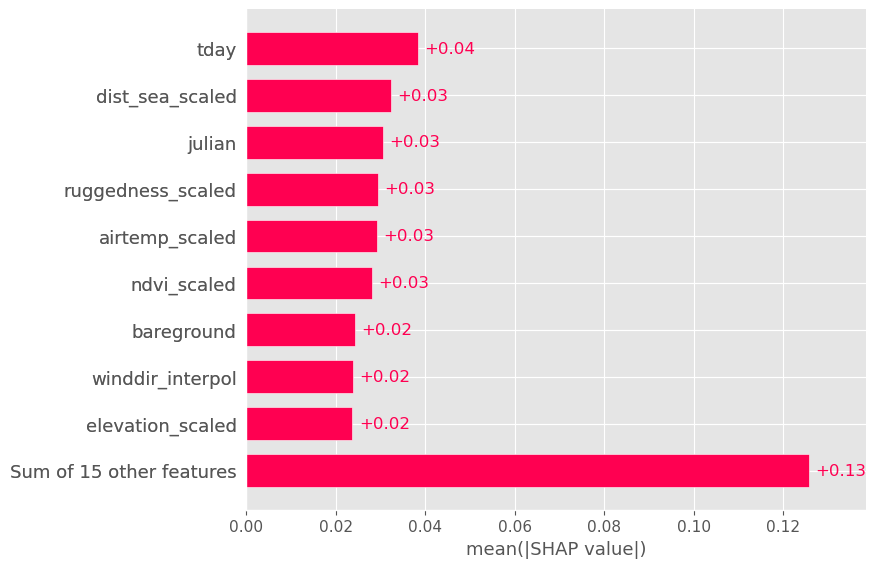

In [11]:
import shap

explainer = shap.Explainer(summer_cov_prediction.predict , summer_covariates.sample(100))
shap_values = explainer(summer_covariates.sample(1000))
shap.plots.bar(shap_values)